# Gradient Descent for Optimization

## Introduction

Gradient descent is an algorithm used to the find local minimums of any differentiable function. More formally, given a differentiable function $f(x),$ the gradient descent algorithms helps us compute $x^*$ such that $f'(x^*) = 0$ and $x^*$ is a minimum of $f(x).$ A function can have many local minimums $x_{1}^{*}, x_{2}^{*}, \ldots, x_{k}^{*},$ the gradient descent algorithm will converge to one of them depending on the its starting position and learning rate (discussed below). 

The name "Gradient Descent" hints at how this algorithm works. The algorithms requires 1) knowing the $\textbf{gradient}$ (partial derivatives) of the function and 2) using the gradient to determine the direction of steepest $\textbf{descent}.$ The idea is that we will begin somewhere on the function, for example $f(x_{1})$, and then climb down the function as quickly as possible towards the first valley (local minimum) where $f'(x^*) = 0.$ The gradient descent algorithm essentially describes the sequence of steps to take to go from $x_{1}$ to a local minimum $x^*.$

Gradient descent (or a variation) is very commonly used to train machine learning models by minimizing some objective function. Many of the objective functions in machine learning are hard to minimize analytically, but we can approximate the minimum using gradient descent. 

## Algorithm intuition

Suppose we have a single variable function $f(x)$ that has a single global minimum (for example a parabola that opens upwards) at $x^*.$ Our goal is to approximate $x^*$ through an itterative algorithm. The first step is to pick a starting point (initial value) for the algorithm, $x_{1}.$ We will randomly guess $x_{1}$ and note that either $x_{1} < x^*$, or $x_{1} > x^*$ (we can get really lucky and have $x_{1} = x^*,$ but this is very unlikely). Since $x^*$ is the global minimum, we know that $f(x^*) < f(x_{1}),$ that is our starting point is above the minimum. Starting at $x_{1}$ we want to take a sequence of steps to get down to $x^*.$ The gradient descent algorithm characterizes the set of steps to take to get from $x_{1}$ down to $x^*.$

Without loss of generality assume our starting position $x_{1} < x^*,$ and let us discuss how to get down towards $x^*.$ Recall that we can compute the gradient of $f(x)$ since we assume the function is differentiable. Suppose we find $f'(x_{1}) < 0,$ that indicates that if we take a step right to $x_{2} > x_{1}$ then we will move down the function since $f(x_{2}) < f(x_{1}).$ This is exactly what we want (moving down the function), so we want to take a step to the right of $x_{1}.$ But how large of a step should we take? Well it makes sense to say the step size will depend on the steepness of the descent. The steeper the descent at $x_{1}$, the larger the step size should be as it indicates we have a long way to go before getting to the minimum. More formally the step size will be proportional to the gradient at $x_{1}.$

Once we get from $x_{1}$ to $x_{2}$, we repeat the same logic as above. Suppose $f'(x_2) < 0$ again, so we need to take a step towards $x_{3} > x_{2}$ to further go down the function. Again our step size will be proportional to $f'(x_2).$ Repeating this process will result in a sequence of steps $x_{1}, x_{2}, \ldots, x_{T}.$ For large values of $T$ we expect $x_{T} \approx x^*.$ The diagram below more formally describes the intuition behind gradient descent.

<img src="gradDesc.jpeg">

The diagram above formally shows a single step of the gradient descent algorithm from $x_{1}$ to $x_{2}$ To determine $x_{2}$ we take a step to the right of $x_{1}$ that is proportional to $f'(x_{1}).$ Mathematically speaking, the sign of $f'(x_{1})$ indicates the direction of the steepest ascent at $x_{1}$ (magnitude of f'(x_{1}) is measure of steepness), but since we want to descend (its called gradient $\textbf{descent}$) we use $-f'(x_{1}).$ Gradient descent relies on a parameter $\lambda$ called the learning rate, let us talk about this more. 

### Thinking about the learning rate

The learning rate $\lambda$ and the steepest descent $-f'(x_{1})$ together determine the step size towards the minimum. Hence the learning rate determines the size of the steps. If $\lambda$ is large then we will take large steps down towards to the minimum. Similarly if $\lambda$ is small it will take longer to converge towards the minimum as the step size is smaller. Does this mean we should pick a really large $\lambda$ to coverge fast towards $x^*?$ No, this is not a good idea. $\lambda$ too large or too small can cause covergence problems as illustrated by the diagram below.

<img src="learnRate.png">

Note that $J(w)$ is the function that we want to minimize in the above diagram. On the left figure $\lambda$ is very large which leads to taking very big steps. These big steps essentially have trouble locating the minimum because they are jumping over it. On the right figure $\lambda$ is very small leading to tiny steps towards the minimum. The algorithm finds a minimum, but its only a local minimum (global minimum is ideal). For the right figure imagine the step size was a bit larger, then the algorithm could jump over the local minimum and possiblly converge into the global minimum. 

So how you do pick the best $\lambda$? This is often done using "cross validation" but will not be discussed in this notebook (hopefully in the future I will have a seperate notebook for cross validation).

## Gradient descent algorithm 

### Single variable

Suppose we have a single variable and differentiable function $f(x).$ Given a initial value $x_{1}$ the gradient descent describes the steps required to coverge towards a local minimum $x^*$ such that $f'(x^*) = 0.$ In the above section we determined that $x_{2} = x_{1} - \lambda f'(x_{1}),$ where $\lambda$ is the learning rate parameter. This formula can be generalized to $$x_{t+1} = x_{t} - \lambda f'(x_{t}),$$ for itteration $t.$ Given initial value $x_{1}$ and large number of itterations $T,$ this algorithm will generate $x_{1}, x_{2}, \ldots, x_{T},$ where $x_{T} \approx x^*.$ That is $x_{t+1}$ converges towards $x^*$ as $t$ gets very large. Notice that at convergence $f'(x_{t}) \approx 0$ and hence $|x_{t+1} - x_{t}| \approx 0.$ Therefore a common stopping criteria for gradience descent is to itterate until $|x_{t+1} - x_{t}|$ is a very small number. For example we can keep itterating gradient descent until $|x_{t+1} - x_{t}| < 0.001.$

### Multiple variables
Consider a multiple variable and differentiable function $f(x_{1},x_{2},\ldots, x_{n}).$ Our goal is to apply gradient descent and find a minimum $(x_{1}^{*}, x_{2}^{*}, \ldots, x_{n}^{*}).$ This function has partial derivatives stored in the gradient vector $(\frac{df(x)}{dx_{1}}, \ldots, \frac{df(x)}{dx_{n}}).$ The direction of the gradient vector indicates direction of steepest ascent, and the length of the gradient vector is a mesuare of the steepness. We can easily generalize the gradient descent to multiple variables as follows:


$$
\begin{bmatrix}
    x_{1}^{t+1} \\ 
    \vdots \\
    x_{n}^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x_{1}^{t} \\ 
    \vdots \\
    x_{n}^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    \frac{df(x_{1})}{dx_{1,t}} \\ 
    \vdots \\
    \frac{df(x_{n})}{dx_{n,t}} \\ 
\end{bmatrix},
$$
where $t$ is the gradient descent itteration. Now the stopping criteria can depend on the euclidean distance between the now and previous itteration, that is stop if $\sqrt{(x_{1}^{t+1} - x_{1}^{t})^2 + \ldots + (x_{n}^{t+1} - x_{n}^{t})^2} < 0.001.$

## Example: Minimizing single variable function

Consider the following single variable function $$f(x) = 0.1x^2 + sin(0.1x^2)$$ and suppose we find its minimum using gradient descent. Gradient descent requires us to compute the first derivative which is $$f'(x) = 0.2x + 0.2xcos(0.1x^2).$$ The plot for f(x) is shown below.

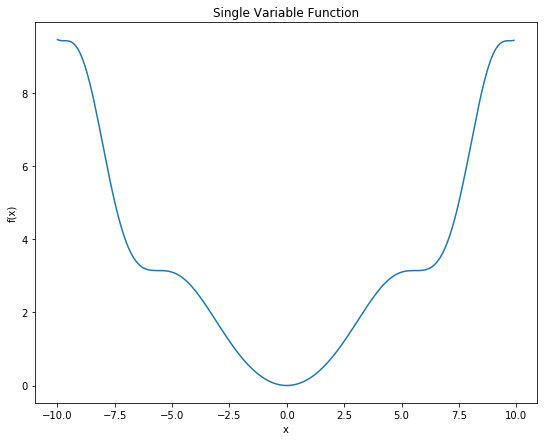

In [66]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import *

# Change size of figures
#fig_size = [9,7]
#rcParams["figure.figsize"] = fig_size

# Define function f(x)
def f(x):
    
    # f(x) = 0.1x^2 + sin(0.1x^2)
    return 0.1*x**2 + sin(0.1*x**2)

# Plot function on given range
# Second arguments allows for seperate points to be ploted on f(x)
def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()
    
# Plot f(x) from [-10,10]
x = arange(-10, 10, 0.1)
plotf(x, np.array([]), "Single Variable Function")

Notice that f(x) has a global minimum at x = 0, but there are also seem to be two local minimums near -5.5 and 5.5. Ideally we want to be able to start anywhere from [-10,10] and use gradient descent to go down towards the minimum of 0. We will see that finding the global minimum depends on initial starting point and learning rate. 

In [4]:
# Derivative of f(x) is f'(x) (denoted by df below)
# f'(x) = 0.2x + 0.2xcos(0.1x^2)
def df(x):
    return 0.2*x + 0.2*x*cos(0.1*(x**2))

Now that we have defined f(x) and f'(x), let us run gradient descent for different initial values and learning parameters and try to compute the global minimum. 

In [67]:
# Gradient descent for single variable
# Depends on f(x), f'(x), x_1, and lambda
def grad_descent(df,x_prev,learn_rate, sequence):

    # Epsilon threshold 
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1

    # First itteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    
    # Save first itteration
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep itterating gradient descent
    while abs(x_next - x_prev) > epsilon:

        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*f'(x_{t})
        x_next = x_prev - learn_rate*df(x_prev)
        
        # Save itteration 
        sequence = np.append(sequence, x_next)
        
        # Increment itteration
        grad_itter += 1
        
    # Output converged x_{T}
    return (x_next, sequence, grad_itter)

### Using ideal learning rate

The example below uses a good learning rate for this context, $\lambda = 1.$ Gradient descent coverges to the global minimum in 20 itterations. 

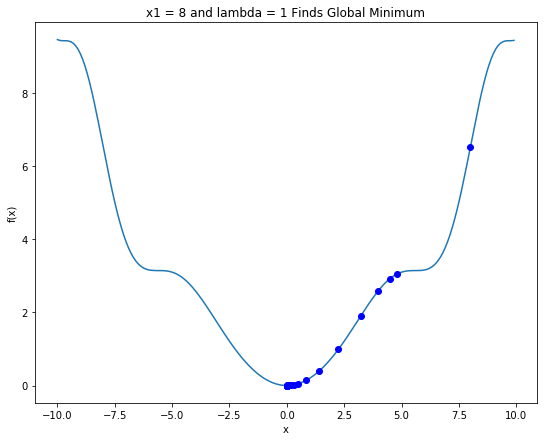

Minimum x-value from gradient descent: 0.00110705547655
Number of gradient descent itterations: 20


In [68]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,8,1, np.array([8]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

### Using a small learning rate

The example below uses a smaller than ideal learning rate of $\lambda = 0.1.$ Not only does this increase the number of gradient descent itterations to 105, but the algorithm coverges to one of the local minimums. 

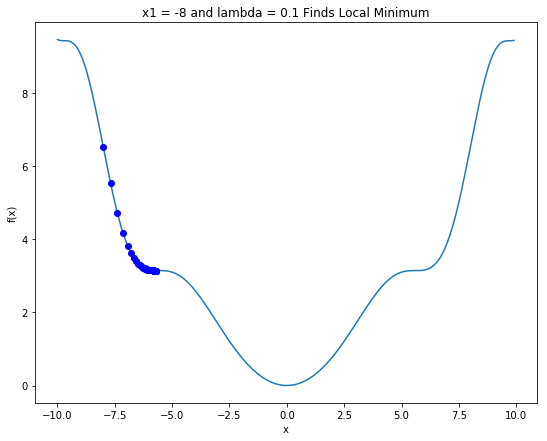

Minimum x-value from gradient descent: -5.71982745285
Number of gradient descent itterations: 105


In [69]:
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,-8,0.1, np.array([-8]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = -8 and lambda = 0.1 Finds Local Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

### Small learning rate but starting close to global minimum

The example below uses a small learning rate (for this context) of $\lambda = 0.1,$ but starts the algoirthm at $x_{1} = -5.$ The key point is that the initial value is now slight beyond the local minimum. Hence even with a small learning rate we are able to eventually converge to the global minimum.

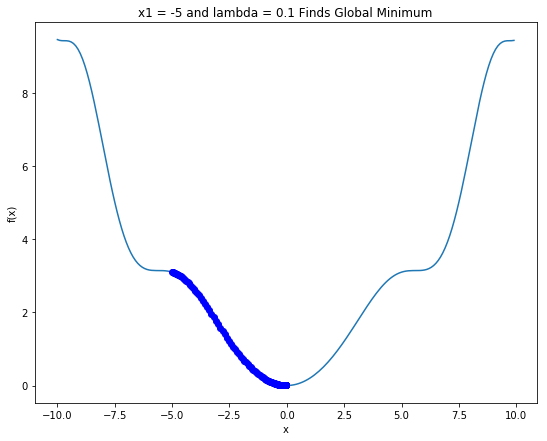

Minimum x-value from gradient descent: -0.0236834514923
Number of gradient descent itterations: 155


In [70]:
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,-5,0.1, np.array([-5]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = -5 and lambda = 0.1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

### Initial value and learning rate are important

From the above exercises of changing the initial value and learning rate we can conclude that gradient descent is not guranteed to converge to the global minimum. Having a really low learning rate can make convergence slower (more itterations before finding minimum) and make it more likely to get stuck at local minimums. A very high learning rate may be even more problematic as gradient descent may never coverge (try $\lambda$ = 6 in the code). The initial value is also important for finding the global minimum. If we start close to the global minimum, we are more likely to find it in the above example even with a smaller than ideal learning rate.

The diagram below shows even with multiple variables different initial values can lead to different local minimums from gradient descent.

<img src="GradDescentMult.png">

## Example: Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


### Plotting f(x,y) in 3D

The 3D plot for f(x,y) and the corresponding countour plots are shown below. This function is essentially a 3D parabola. 

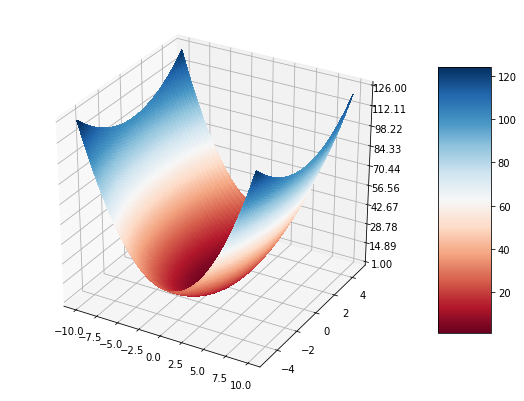

In [72]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
y = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()    

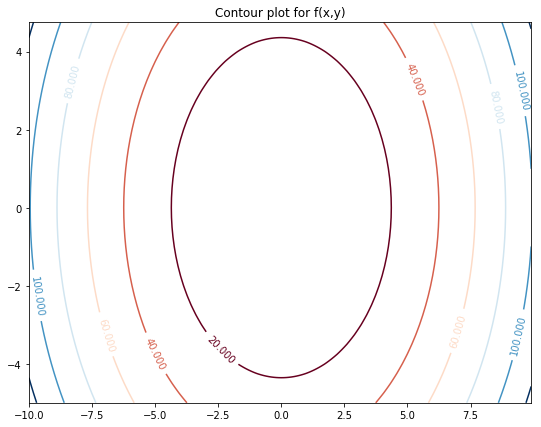

In [73]:
# Function for contour plot with points on it
def contour_plot(x_seq,y_seq, x1):

    # Contour plots for f(x,y) = x^2 + y^2 + 1
    figure(1)
    CS = contour(X, Y, Z, cmap=cm.RdBu)
    clabel(CS, inline=1, fontsize=10)
    
    # Initial point
    plot(x1[0],x1[1],'ro')
    
    # Sequence of points from gradient descent itterations
    plot(x_seq,y_seq,'ro')
    title('Contour plot for f(x,y)')
    show()

# Contour plot with no points
contour_plot([],[],[[],[]])

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent itteration. 

In [74]:
# Partial derivatives

# df/dx = 2x
def dfdx(x,y):
    return 2*x

# df/dy = 2y
def dfdy(x,y):
    return 2*y

# Gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])  

In [75]:
# Gradient descent for multiple variable
def grad_descent_mult(df,x_prev,learn_rate):
    
    # Epsilon threshold 
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1
    
    # Save itteration 
    seq_x = []
    seq_y = []

    # First itteration of gradient descent
    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    
    # Save starting itteration
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # Itterate until abs(x_{t+1} - x_{t}) < epsilon
    # abs(x_{t+1} - x_{t}) is defined as euclidean distance 
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*[df/dx df/dy]
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        
        # Increment itteration
        grad_itter += 1
        
        # Update sequence of itterations
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    # gradient descent output
    return (x_next, grad_itter, seq_x,seq_y)

Minimum (x,y) from gradient descent: [ 0.0010156   0.00033853]
Number of gradient descent itterations: 17


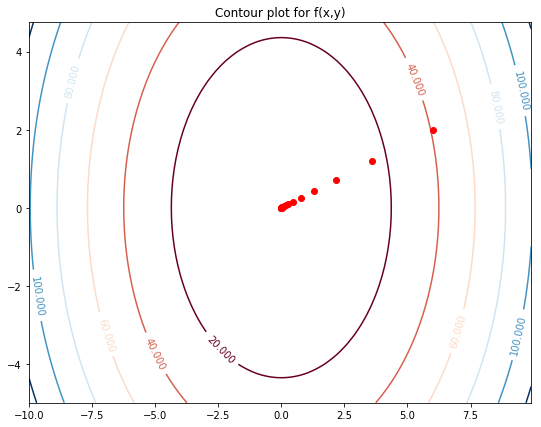

In [76]:
# Gradient desecent with x1 = [6,2] and learn rate lambda = 0.2
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

# Print gradient descent solution
print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[1])

# Convergence sequence (x_t,y_t) on contour plot
contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

As expected the gradient descent in multiple variables converges close to the global minimum of (0,0). The contour plot shows the sequence of $(x_t,y_t)$ resulting from gradient descent that coverge to (0,0) from the initial value. Feel free to play around with the initial value and learning rate above. 

## Conclusion

Gradient descent is a first order (requires first derivative) optimization algorithm used to minimize a given objective function. The algorithm depends on the initial value and the learning rate. The idea behind gradient descent is that it takes a seqeuence of steps to go from the starting position to a local minimum. An initial value that is somewhat close to the global minimum is ideal. Too small a learning rate makes it more likely for the algorithm to get stuck at a local minimum. Whereas too high a learning rate makes it more likely that the algorithm will skip over the global minimum. As we discussed in this notebook, the gradient descent can be applied to any first differentiable function (single or multiple variabe) to approximate the minimums (can be local minimums) even if analytical ($f'(x) = 0$ solve for x) solutions are difficult.